In [8]:
from subprocess import *
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import math
import copy
import os

In [9]:
os.environ['PATH'] += os.pathsep + '/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/exe/'
os.environ['DATAPATH'] = '/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/data_tables/'
print(os.environ['PATH'])

/home/jcdenton/anaconda3/envs/editing_events/bin:/home/jcdenton/.vscode-server/bin/6261075646f055b99068d3688932416f2346dd3b/bin/remote-cli:/home/jcdenton/.local/bin:/home/jcdenton/anaconda3/envs/editing_events/bin:/home/jcdenton/anaconda3/condabin:/home/jcdenton/.cargo/bin:/home/jcdenton/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/opt/spark/bin:/opt/spark/sbin:/usr/lib/jvm/java-8-openjdk-amd64/bin:/usr/local/go/bin:/opt/spark/bin:/opt/spark/sbin:/usr/lib/jvm/java-8-openjdk-amd64/bin:/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/exe/:/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/exe/:/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/exe/:/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/exe/


In [10]:
os.system('echo $DATAPATH')

/home/jcdenton/projects/mirgenedb_editing_events/src/RNAstructure/data_tables/


0

In [11]:
def naive(p, t):
    start = 0
    p = p.replace('U', 'T')
    t = t.replace('U', 'T')
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            start = i
    end = start + len(p)
    return({'start' : start, 'end' : end})

In [12]:
def CountWhobbles(input_fold):
    output_list = [0] * len(input_fold)
    for n in range(len(input_fold)):
        if n <= len(output_list):
            if input_fold[n] == '.':
                output_list[n] += 1
    return(output_list)

In [33]:
stemfile = open('/home/jcdenton/projects/mirgenedb_database/merged_all-pri-30-30.fas', 'r')
loopfile = open('/home/jcdenton/projects/mirgenedb_database/merged_all-loop.fas', 'r')
stem = SeqIO.to_dict(SeqIO.parse(stemfile, "fasta"))
loop = SeqIO.to_dict(SeqIO.parse(loopfile, "fasta"))
matures = open('/home/jcdenton/projects/mirgenedb_database/mature_id.txt', 'r')

matures_5p = []
matures_3p = []
for n in matures:
    if n[-3:] == '5p\n':
        matures_5p.append(n[1:-4])
    if n[-3:] == '3p\n':
        matures_3p.append(n[1:-4])
comatures = []
for n in matures_5p:
    if n in matures_3p:
        comatures.append(n)
non_co_matures_5p = []
for n in matures_5p:
    if n not in comatures:
        non_co_matures_5p.append(n)
non_co_matures_3p = []
for n in matures_3p:
    if n not in comatures:
        non_co_matures_3p.append(n)

species_names = {
 "Hsa" : "Human", 
 "Mmu" : "Mouse", 
 "Rno" : "Rat", 
 "Cpo" : "Guinea_Pig", 
 "Ocu" : "Rabbit", 
 "Dno" : "Armadillo", 
 "Gga" : "Chicken", 
 "Dre" : "Zebrafish", 
 "Mml" : "Rhesus_monkey", 
 "Cfa" : "Dog", 
 "Bta" : "Cow", 
 "Ete" : "Lesser_hedgehog_tenrec", 
 "Cli" : "Rock_pigeon", 
 "Ami" : "American_aligator", 
 "Cpi" : "Western_painted_turtle", 
 "Aca" : "Green_anole_lizard", 
 "Xtr" : "Tropical_clawed_frog", 
 "Bfl" : "Florida_lancet", 
 "Sko" : "Acorn_worm", 
 "Spu" : "Purple_sea_urchin", 
 "Dme" : "Fruit_fly_Dme", 
 "Dmo" : "Fruit_flu_Dmo",
 "Dan" : "Fruit_fly_Dan",
 "Dpu" : "Common_water_flea", 
 "Isc" : "Black-legged_tick", 
 "Cel" : "Roundworm_Cel", 
 "Lgi" : "Owl_limpet", 
 "Cgi" : "Pacific_oyster", 
 "Cte" : "Polychaete_worm", 
 "Efe" : "Common_brandling_worm", 
 "Pmi" : "Bar_starfish", 
 "Tca" : "Red flour beetle", 
 "Asu" : "Large roundworm", 
 "Pfl" : "Acorn worm 2", 
 "Mdo" : "Opossum", 
 "Sha" : "Tasmanian devil",
 "Aae" : "Yellow fever mosquito",
 "Hme" : "Longwing",
 "Bge" : "Cockroach",
 "Cbr" : "Roundworm_Cbr",
 "Lan" : "Lingula",
 "Cin" : "Sea Squirt",
 "Tgu" : "Zebra finch",
 "Oan" : "Platypus",
 "Sto" : "Cloudy Catshark",
 "Aqu" : "Amphimedon",
 "Bla" : "European lancet",
 "Cmi" : "Australian ghostshark",
 "Dsi" : "Fruit_fly_Dsi",
 "Dya" : "Fruit_fly_Dya",
 "Ebu" : "Inshore hagfish",
 "Emu" : "Muellers freshwater sponge",
 "Gja" : "Schlegels Japanese gecko",
 "Gmo" : "Cod",
 "Hvu" : "Freshwater-polyp",
 "Lch" : "Coelacanth",
 "Loc" : "Spotted gar",
 "Lpo" : "Atlantic horseshoe crab",
 "Mal" : "Asian swamp eel",
 "Mun" : "Microcaecelia",
 "Nve" : "Starlet sea anemone",
 "Pbv" : "Burmese python",
 "Pma" : "Sea Lamprey",
 "Spt" : "Tuatara",
 "Tni" : "Pufferfish",
 "Xla" : "African clawed Frog",
 "Csc" : "Arizona bark skorpion",
 "Obi" : "California two-spot octopus",
 "Ovu" : "Common octopus",
 "Bpl" : "Rotifer",
 "Dma" : "Large commom water flea",
 "Esc" : "Hawaiian bobtail squid",
 "Npo" : "Chambered Nautilus",
 "Sme" : "Freshwater planarian",
 "Xbo" : "Xenoturbella"
}

# List for motif histogram
UG_5p = [0] * 30
UG_3p = [0] * 30
UGUG_5p = [0] * 8
UGUG_3p = [0] * 8
mer_dict_up = {}
mer_dict_up_5p = {}
mer_dict_up_3p = {}
mer_dict_loop = {}
mer_dict_loop_5p = {}
mer_dict_loop_3p = {}
mer_dict_down = {}
mer_dict_down_5p = {}
mer_dict_down_3p = {}
UG_loop_both = [0] * 8
UG_loop_5p = [0] * 8
UG_loop_3p = [0] * 8
CNNC_5p = [0] * 30
CNNC_3p = [0] * 30
total_5p = 0
total_3p = 0
U_pos_1_5p_Mature = []
U_pos_1_3p_Mature = []
no_U_pos_1_5p_Mature = []
no_U_pos_1_3p_Mature = []
bulge_pos_1_5p_Mature = []
bulge_pos_1_3p_Mature = []
no_bulge_pos_1_5p_Mature = []
no_bulge_pos_1_3p_Mature = []
TGCA = ['T', 'G', 'C', 'A']
for mer1 in TGCA:
    for mer2 in TGCA:
        mer_dict_up[str(mer1) + str(mer2)] = [0]*30
        mer_dict_up_5p[str(mer1) + str(mer2)] = [0]*30
        mer_dict_up_3p[str(mer1) + str(mer2)] = [0]*30
        mer_dict_loop[str(mer1) + str(mer2)] = [0]*8
        mer_dict_loop_5p[str(mer1) + str(mer2)] = [0]*8
        mer_dict_loop_3p[str(mer1) + str(mer2)] = [0]*8
        mer_dict_down[str(mer1) + str(mer2)] = [0]*30
        mer_dict_down_5p[str(mer1) + str(mer2)] = [0]*30
        mer_dict_down_3p[str(mer1) + str(mer2)] = [0]*30

# Dictionaries for bulge heatmap
bulges = {}   # Dictionary of dictionaries with number up- and downstream pri-miRNA bulges per species
BulgeLenMature = {}
BulgeLen5pMature = {}
BulgeLen3pMature = {}
BulgeLen5p = {}
BulgeLen3p = {}
BulgeLenStar = {}
linregmature = {}
linregstar = {}
linreg5p = {}
linreg3p = {}
high_bulge_nr = {}
high_low_len = {}

fiveprimeUp_seq   = {'A' : [0]*52, 'C' : [0]*52, 'G' : [0]*52, 'U' : [0]*52, 'total' : 0}
fiveprimeDown_seq = {'A' : [0]*52, 'C' : [0]*52, 'G' : [0]*52, 'U' : [0]*52, 'total' : 0}
threeprimeUp_seq  = {'A' : [0]*52, 'C' : [0]*52, 'G' : [0]*52, 'U' : [0]*52, 'total' : 0}
threeprimeDown_seq= {'A' : [0]*52, 'C' : [0]*52, 'G' : [0]*52, 'U' : [0]*52, 'total' : 0}
fiveprimeLoop_seq = {'A' : [0]*8,  'C' : [0]*8,  'G' : [0]*8,  'U' : [0]*8,  'total' : 0}
threeprimeLoop_seq= {'A' : [0]*8,  'C' : [0]*8,  'G' : [0]*8,  'U' : [0]*8,  'total' : 0}

for n in species_names:
    bulges.update({species_names[n] : {'nr_mirna_5p' : 0, 'nr_mirna_3p' : 0}})

for n in stem:
    ### Loop over all pri-miRNA sequences in MirGeneDB
    species = species_names[stem[n].name[0:3]]              # check species
    workingfile = open("workingfile.txt", "w")
    workingfile.write(str(stem[n].seq) + '\n')
    if stem[n].name[:-4] + '_loop' not in loop:
        continue
    loopstart = naive(str(loop[n[:-4] + '_loop'].seq), str(stem[n].seq))['start'] # find start position and end
    loopend   = naive(str(loop[n[:-4] + '_loop'].seq), str(stem[n].seq))['end']   # position of loop sequence
    workingfile.close()

    constraints = open("constraints.txt", "w")
    constraints.write('P' + ' ' + str(1)         + ' ' + str(0) + ' ' + str(17) + '\n')
    constraints.write('P' + ' ' + str(len(stem[n].seq) - 17 + 1) + ' ' + str(0) + ' ' + str(17))
    constraints.close()
    os.system('mfold SEQ=workingfile.txt AUX=constraints.txt')
    os.system('ct2dot workingfile.txt.ct ALL workingfile.txt.dot')
    with open('workingfile.txt.dot', 'r') as file:
        dG = file.readline()
        seq = file.readline()
        dot = file.readline()
    folded = [seq.split('\n')[0], dot.split('\n')[0]]
    print(folded)
    file.close()
    
#    folded = RNAfold(workingfile)                   # Fold pri-miRNA with RNAfold
#    workingfile.close()
    i = CountWhobbles(folded[1])                    # Count '.' per position 
    UpBulgeLen = len(i[30:loopstart])
    DownBulgeLen=len(i[loopend:-30])
    UpNrBulges = sum(i[30:loopstart])
    DownNrBulges=sum(i[loopend:-30]) 
    UpBulgeLenRatio = sum(i[30:loopstart]) / len(i[30:loopstart])
    DownBulgeLenRatio = sum(i[loopend:-30]) / len(i[loopend:-30])
    UpSequence = stem[n].seq[:loopstart]
    DownSequence = stem[n].seq[loopend:]
    LoopSequence = stem[n].seq[loopstart:loopend]

    # Count Sequential Motifs
    for y in range(30):
        if stem[n].seq[y] == 'T' and stem[n].seq[y + 1] == 'G':
            if stem[n].name[:-4] in non_co_matures_5p:
                UG_5p[y] += 1
            if stem[n].name[:-4] in non_co_matures_3p:
                UG_3p[y] += 1
    for y in range(26):
        if (loopend + 22 + y + 3) >= len(stem[n].seq):
            continue
        if stem[n].seq[loopend + 22 + y] == 'C' and stem[n].seq[loopend + 22 + y + 3] == 'C':
            if stem[n].name[:-4] in non_co_matures_5p:
                CNNC_5p[y] += 1
            if stem[n].name[:-4] in non_co_matures_3p:
                CNNC_3p[y] += 1
    for y in range(8):
#        if len(loop[n[:-4] + '_loop'].seq) + 2 >= 7:
#            continue
        if y + 2 >=  len(loop[n[:-4] + '_loop'].seq):
            continue
        if loop[n[:-4] + '_loop'].seq[y] == 'U' and loop[n[:-4] + '_loop'].seq[y + 1] == 'G' and loop[n[:-4] + '_loop'].seq[y + 2] == 'U':
            if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_5p:
                UGUG_5p[y] += 1
        elif loop[n[:-4] + '_loop'].seq[y] == 'G' and loop[n[:-4] + '_loop'].seq[y + 1] == 'U' and loop[n[:-4] + '_loop'].seq[y + 2] == 'G':
            if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_3p:
                UGUG_3p[y] += 1
        if loop[n[:-4] + '_loop'].seq[y] == 'U' and loop[n[:-4] + '_loop'].seq[y + 1] == 'G':
            UG_loop_both[y] += 1
            if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_5p:
                UG_loop_5p[y] += 1
            if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_3p:
                UG_loop_3p[y] += 1
            
    for mer1 in TGCA:
        for mer2 in TGCA:
            for y in range(30):
                if stem[n].seq[y] == str(mer1) and stem[n].seq[y + 1] == str(mer2):
                    mer_dict_up[str(mer1)+str(mer2)][y] += 1
                if stem[n].name[:-4] in non_co_matures_5p:
                    if stem[n].seq[y] == str(mer1) and stem[n].seq[y + 1] == str(mer2):
                        mer_dict_up_5p[str(mer1)+str(mer2)][y]+=1
                if stem[n].name[:-4] in non_co_matures_3p:
                    if stem[n].seq[y] == str(mer1) and stem[n].seq[y + 1] == str(mer2):
                        mer_dict_up_3p[str(mer1)+str(mer2)][y]+=1
            for y in range(8):
                if y + 2 >= len(loop[n[:-4] + '_loop'].seq):
                    continue
                if loop[n[:-4] + '_loop'].seq[y] == str(mer1).replace('T', 'U') and loop[n[:-4] + '_loop'].seq[y + 1] == str(mer2).replace('T', 'U'):
                    mer_dict_loop[str(mer1)+str(mer2)][y] += 1
                if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_5p:
                    if loop[n[:-4] + '_loop'].seq[y] == str(mer1).replace('T','U') and loop[n[:-4] + '_loop'].seq[y + 1] == str(mer2).replace('T', 'U'):
                        mer_dict_loop_5p[str(mer1)+str(mer2)][y] +=1
                if loop[n[:-4] + '_loop'].id[:-5] in non_co_matures_3p:
                    if loop[n[:-4] + '_loop'].seq[y] == str(mer1).replace('T','U') and loop[n[:-4] + '_loop'].seq[y + 1] == str(mer2).replace('T', 'U'):
                        mer_dict_loop_3p[str(mer1)+str(mer2)][y] +=1
            for y in range(30):
                if (loopend + 22 + y + 1) >= len(stem[n].seq):
                    continue
                if stem[n].seq[loopend + 22 + y] == str(mer1) and stem[n].seq[loopend + 22 + y + 1] == str(mer2):
                    mer_dict_down[str(mer1)+str(mer2)][y] += 1
                if stem[n].name[:-4] in non_co_matures_5p:
                    if stem[n].seq[loopend + 22 + y] == str(mer1) and stem[n].seq[loopend + 22 + y + 1] == str(mer2):
                        mer_dict_down_5p[str(mer1)+str(mer2)][y] +=1
                if stem[n].name[:-4] in non_co_matures_3p:
                    if stem[n].seq[loopend + 22 + y] == str(mer1) and stem[n].seq[loopend + 22 + y + 1] == str(mer2):
                        mer_dict_down_3p[str(mer1)+str(mer2)][y] +=1
    if stem[n].name[:-4] in non_co_matures_5p:
        total_5p += 1
    if stem[n].name[:-4] in non_co_matures_3p:
        total_3p += 1

    # Count bases in each position
    if stem[n].name[:-4] in non_co_matures_5p:
        for y in range(len(UpSequence)):
            if y >= 52:
                continue
            if UpSequence[y] == 'A':
                fiveprimeUp_seq['A'][y] += 1
            if UpSequence[y] == 'C':
                fiveprimeUp_seq['C'][y] += 1
            if UpSequence[y] == 'G':
                fiveprimeUp_seq['G'][y] += 1
            if UpSequence[y] == 'T':
                fiveprimeUp_seq['U'][y] += 1
        fiveprimeUp_seq['total'] += 1
        for y in range(len(DownSequence)):
            if y >= 52:
                continue
            if DownSequence[y] == 'A':
                fiveprimeDown_seq['A'][y] += 1
            if DownSequence[y] == 'C':
                fiveprimeDown_seq['C'][y] += 1
            if DownSequence[y] == 'G':
                fiveprimeDown_seq['G'][y] += 1
            if DownSequence[y] == 'T':
                fiveprimeDown_seq['U'][y] += 1
        fiveprimeDown_seq['total'] += 1
        for y in range(len(LoopSequence)):
            if y >= 8:
                continue
            if LoopSequence[y] == 'A':
                fiveprimeLoop_seq['A'][y] += 1
            if LoopSequence[y] == 'C':
                fiveprimeLoop_seq['C'][y] += 1
            if LoopSequence[y] == 'G':
                fiveprimeLoop_seq['G'][y] += 1
            if LoopSequence[y] == 'T':
                fiveprimeLoop_seq['U'][y] += 1
        fiveprimeLoop_seq['total'] += 1
    if stem[n].name[:-4] in non_co_matures_3p:
        for y in range(len(UpSequence)):
            if y >= 52:
                continue
            if UpSequence[y] == 'A':
                threeprimeUp_seq['A'][y] += 1
            if UpSequence[y] == 'C':
                threeprimeUp_seq['C'][y] += 1
            if UpSequence[y] == 'G':
                threeprimeUp_seq['G'][y] += 1
            if UpSequence[y] == 'T':
                threeprimeUp_seq['U'][y] += 1
        threeprimeUp_seq['total'] += 1
        for y in range(len(DownSequence)):
            if y >= 52:
                continue
            if DownSequence[y] == 'A':
                threeprimeDown_seq['A'][y] += 1
            if DownSequence[y] == 'C':
                threeprimeDown_seq['C'][y] += 1
            if DownSequence[y] == 'G':
                threeprimeDown_seq['G'][y] += 1
            if DownSequence[y] == 'T':
                threeprimeDown_seq['U'][y] += 1
        threeprimeDown_seq['total'] += 1
        for y in range(len(LoopSequence)):
            if y >= 8:
                continue
            if LoopSequence[y] == 'A':
                threeprimeLoop_seq['A'][y] += 1
            if LoopSequence[y] == 'C':
                threeprimeLoop_seq['C'][y] += 1
            if LoopSequence[y] == 'G':
                threeprimeLoop_seq['G'][y] += 1
            if LoopSequence[y] == 'T':
                threeprimeLoop_seq['U'][y] += 1
        threeprimeLoop_seq['total'] += 1
    
    # Count bulges for 5p extended arm, loop(first 8 nt) and 3p extended arm
    if UpBulgeLen > 26 or UpBulgeLen < 20:
        high_low_len[stem[n].name[:-4] + '_5p_Arm'] = ['Len:_' + str(UpBulgeLen)]
    if DownBulgeLen > 26 or DownBulgeLen < 20:
        high_low_len[stem[n].name[:-4] + '_3p_Arm'] = ['Len:_' + str(DownBulgeLen)]
    if UpNrBulges > 12:
        high_bulge_nr[stem[n].name[:-4] + '_5p_Arm'] = ['Nr_Bulges:_' + str(UpNrBulges)]
    if DownNrBulges > 12:
        high_bulge_nr[stem[n].name[:-4] + '_3p_Arm'] = ['Nr_Bulges:_' + str(DownNrBulges)]

    # Count bulges in 5p Matures    
    if stem[n].name[:-4] in non_co_matures_5p:
        bulges[species]['nr_mirna_5p'] += 1
        if 'Up5pMature' not in bulges[species]:
            bulges[species]['Up5pMature'] = [0] * 52#loopstart
        k = bulges[species]['Up5pMature']
        for y in range(len(i)):
            if y < len(k):
                k[y] += i[y]
        if 'Down5pMature' not in bulges[species]:
            bulges[species]['Down5pMature'] = [0] * 52#(len(i) - loopend)
        k = bulges[species]['Down5pMature']
        for y in range(len(i) - loopend):
            if y < len(k):
                k[y] += i[y + loopend]
                          
        linregmature[stem[n].name[:-4]] = list([UpBulgeLen, UpNrBulges])
        linreg5p[stem[n].name[:-4]] = list([UpBulgeLen, UpNrBulges])
        linreg3p[stem[n].name[:-4]] = list([DownBulgeLen, DownNrBulges])
                          
        if 'Loop5pMature' not in bulges[species]:
            bulges[species]['Loop5pMature'] = [0]*8
        for y in range(loopstart, loopend):
            if y - loopstart < len(bulges[species]['Loop5pMature']):
                bulges[species]['Loop5pMature'][y - loopstart] += i[y]
        # count bulges in all matures
        if str(UpBulgeLen) + ' ' + str(UpNrBulges) not in BulgeLenMature:
            BulgeLenMature[str(UpBulgeLen) + ' ' + str(UpNrBulges)] = 0
        BulgeLenMature[str(UpBulgeLen) + ' ' + str(UpNrBulges)] += 1
        if str(DownBulgeLen) + ' ' + str(DownNrBulges) not in BulgeLenStar:
            BulgeLenStar[str(DownBulgeLen) + ' ' + str(DownNrBulges)] = 0
        BulgeLenStar[str(DownBulgeLen) + ' ' + str(DownNrBulges)] += 1
        
        # count bulges in 5p Matures
        if str(UpBulgeLen) + ' ' + str(UpNrBulges) not in BulgeLen5pMature:
            BulgeLen5pMature[str(UpBulgeLen) + ' ' + str(UpNrBulges)] = 0
        BulgeLen5pMature[str(UpBulgeLen) + ' ' + str(UpNrBulges)] += 1
        
        # count bulges in ALL 5p sequence and 3p Sequence
        if str(UpBulgeLen) + ' ' + str(UpNrBulges) not in BulgeLen5p:
            BulgeLen5p[str(UpBulgeLen) + ' ' + str(UpNrBulges)] = 0
        BulgeLen5p[str(UpBulgeLen) + ' ' + str(UpNrBulges)] += 1

        if str(DownBulgeLen) + ' ' + str(DownNrBulges) not in BulgeLen3p:
            BulgeLen3p[str(DownBulgeLen) + ' ' + str(DownNrBulges)] = 0
        BulgeLen3p[str(DownBulgeLen) + ' ' + str(DownNrBulges)] += 1
        
        linregstar[stem[n].name[:-4]] = list([DownBulgeLen, DownNrBulges])
           
        # Make lists of 5p matures that have the bulge or U at pos 1 in mature / star sequence
        if UpSequence[30] == 'T':
            U_pos_1_5p_Mature.append(stem[n].id[:-4])
        else:
            no_U_pos_1_5p_Mature.append(stem[n].id[:-4])
            
        if folded[1][30] == '.':
            bulge_pos_1_5p_Mature.append(stem[n].id[:-4])
        else:
            no_bulge_pos_1_5p_Mature.append(stem[n].id[:-4])
            
    # Count bulges in 3p Matures
    if stem[n].name[:-4] in non_co_matures_3p:
        bulges[species]['nr_mirna_3p'] += 1
        if 'Up3pMature' not in bulges[species]:
            bulges[species]['Up3pMature'] = [0] * 52#loopstart
        k = bulges[species]['Up3pMature']
        for y in range(len(i)):
            if y < len(k):
                k[y] += i[y]

        if 'Down3pMature' not in bulges[species]:
            bulges[species]['Down3pMature'] = [0] * 52#(len(i) - loopend)
        k = bulges[species]['Down3pMature']
        for y in range(len(i) - loopend):
            if y < len(k):
                k[y] += i[y + loopend]
        
        linregmature[stem[n].name[:-4]] = list([DownBulgeLen, DownNrBulges])

        if 'Loop3pMature' not in bulges[species]:
            bulges[species]['Loop3pMature'] = [0]*8
        for y in range(loopstart, loopend):
            if y - loopstart < len(bulges[species]['Loop3pMature']):
                bulges[species]['Loop3pMature'][y - loopstart] += i[y]
        
        if str(DownBulgeLen) + ' ' + str(DownNrBulges) not in BulgeLenMature:
            BulgeLenMature[str(DownBulgeLen) + ' ' + str(DownNrBulges)] = 0
        BulgeLenMature[str(DownBulgeLen) + ' ' + str(DownNrBulges)] += 1
        if str(UpBulgeLen) + ' ' + str(UpNrBulges) not in BulgeLenStar:
            BulgeLenStar[str(UpBulgeLen) + ' ' + str(UpNrBulges)] = 0
        BulgeLenStar[str(UpBulgeLen) + ' ' + str(UpNrBulges)] += 1

        if str(DownBulgeLen) + ' ' + str(DownNrBulges) not in BulgeLen3pMature:
            BulgeLen3pMature[str(DownBulgeLen) + ' ' + str(DownNrBulges)] = 0
        BulgeLen3pMature[str(DownBulgeLen) + ' ' + str(DownNrBulges)] += 1

        # count bulges in ALL 5p sequence and 3p Sequence
        if str(UpBulgeLen) + ' ' + str(UpNrBulges) not in BulgeLen5p:
            BulgeLen5p[str(UpBulgeLen) + ' ' + str(UpNrBulges)] = 0
        BulgeLen5p[str(UpBulgeLen) + ' ' + str(UpNrBulges)] += 1

        if str(DownBulgeLen) + ' ' + str(DownNrBulges) not in BulgeLen3p:
            BulgeLen3p[str(DownBulgeLen) + ' ' + str(DownNrBulges)] = 0
        BulgeLen3p[str(DownBulgeLen) + ' ' + str(DownNrBulges)] += 1
        
        linregstar[stem[n].name[:-4]] = list([UpBulgeLen, UpNrBulges])
        linreg5p[stem[n].name[:-4]] = list([UpBulgeLen, UpNrBulges])
        linreg3p[stem[n].name[:-4]] = list([DownBulgeLen, DownNrBulges])

        # Make lists of 3p matures that have the bulge or U at pos 1 in mature / star sequence
        if DownSequence[0] == 'T':
            U_pos_1_3p_Mature.append(stem[n].id[:-4])
        else:
            no_U_pos_1_3p_Mature.append(stem[n].id[:-4])
            
        if folded[1][loopend + 1] == '.':
            bulge_pos_1_3p_Mature.append(stem[n].id[:-4])
        else:
            no_bulge_pos_1_3p_Mature.append(stem[n].id[:-4])
        
for a in range(len(fiveprimeUp_seq['A'])):
    fiveprimeUp_seq['A'][a] = float(fiveprimeUp_seq['A'][a]) / float(fiveprimeUp_seq['total']) * 100.0
    fiveprimeUp_seq['C'][a] = float(fiveprimeUp_seq['C'][a]) / float(fiveprimeUp_seq['total']) * 100.0
    fiveprimeUp_seq['U'][a] = float(fiveprimeUp_seq['U'][a]) / float(fiveprimeUp_seq['total']) * 100.0
    fiveprimeUp_seq['G'][a] = float(fiveprimeUp_seq['G'][a]) / float(fiveprimeUp_seq['total']) * 100.0
for a in range(len(fiveprimeDown_seq['A'])):
    fiveprimeDown_seq['A'][a] = float(fiveprimeDown_seq['A'][a]) / float(fiveprimeDown_seq['total']) * 100.0
    fiveprimeDown_seq['C'][a] = float(fiveprimeDown_seq['C'][a]) / float(fiveprimeDown_seq['total']) * 100.0
    fiveprimeDown_seq['U'][a] = float(fiveprimeDown_seq['U'][a]) / float(fiveprimeDown_seq['total']) * 100.0
    fiveprimeDown_seq['G'][a] = float(fiveprimeDown_seq['G'][a]) / float(fiveprimeDown_seq['total']) * 100.0
for a in range(len(fiveprimeLoop_seq['A'])):
    fiveprimeLoop_seq['A'][a] = float(fiveprimeLoop_seq['A'][a]) / float(fiveprimeLoop_seq['total']) * 100.0
    fiveprimeLoop_seq['C'][a] = float(fiveprimeLoop_seq['C'][a]) / float(fiveprimeLoop_seq['total']) * 100.0
    fiveprimeLoop_seq['U'][a] = float(fiveprimeLoop_seq['U'][a]) / float(fiveprimeLoop_seq['total']) * 100.0
    fiveprimeLoop_seq['G'][a] = float(fiveprimeLoop_seq['G'][a]) / float(fiveprimeLoop_seq['total']) * 100.0
for a in range(len(threeprimeUp_seq['A'])):
    threeprimeUp_seq['A'][a] = float(threeprimeUp_seq['A'][a]) / float(threeprimeUp_seq['total']) * 100.0
    threeprimeUp_seq['C'][a] = float(threeprimeUp_seq['C'][a]) / float(threeprimeUp_seq['total']) * 100.0
    threeprimeUp_seq['U'][a] = float(threeprimeUp_seq['U'][a]) / float(threeprimeUp_seq['total']) * 100.0
    threeprimeUp_seq['G'][a] = float(threeprimeUp_seq['G'][a]) / float(threeprimeUp_seq['total']) * 100.0
for a in range(len(threeprimeDown_seq['A'])):
    threeprimeDown_seq['A'][a] = float(threeprimeDown_seq['A'][a]) / float(threeprimeDown_seq['total']) * 100.0
    threeprimeDown_seq['C'][a] = float(threeprimeDown_seq['C'][a]) / float(threeprimeDown_seq['total']) * 100.0
    threeprimeDown_seq['U'][a] = float(threeprimeDown_seq['U'][a]) / float(threeprimeDown_seq['total']) * 100.0
    threeprimeDown_seq['G'][a] = float(threeprimeDown_seq['G'][a]) / float(threeprimeDown_seq['total']) * 100.0
for a in range(len(threeprimeLoop_seq['A'])):
    threeprimeLoop_seq['A'][a] = float(threeprimeLoop_seq['A'][a]) / float(threeprimeLoop_seq['total']) * 100.0
    threeprimeLoop_seq['C'][a] = float(threeprimeLoop_seq['C'][a]) / float(threeprimeLoop_seq['total']) * 100.0
    threeprimeLoop_seq['U'][a] = float(threeprimeLoop_seq['U'][a]) / float(threeprimeLoop_seq['total']) * 100.0
    threeprimeLoop_seq['G'][a] = float(threeprimeLoop_seq['G'][a]) / float(threeprimeLoop_seq['total']) * 100.0

fiveprimeUp_seq = pd.DataFrame.from_dict([fiveprimeUp_seq.get(key) for key in['A', 'C', 'G', 'U']]).T
fiveprimeDown_seq = pd.DataFrame.from_dict([fiveprimeDown_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
fiveprimeLoop_seq = pd.DataFrame.from_dict([fiveprimeLoop_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeUp_seq = pd.DataFrame.from_dict([threeprimeUp_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeDown_seq = pd.DataFrame.from_dict([threeprimeDown_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeLoop_seq = pd.DataFrame.from_dict([threeprimeLoop_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T

#copy_bulges = copy.copy(bulges)
for n in bulges:
    if bulges[n]['nr_mirna_5p'] == 0 and bulges[n]['nr_mirna_3p'] == 0:
        continue
    if 'Up5pMature' not in bulges[n]:
        continue
    for y in range(len(bulges[n]['Up5pMature'])):
        bulges[n]['Up5pMature'][y] = bulges[n]['Up5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Down5pMature'])):
        bulges[n]['Down5pMature'][y] = bulges[n]['Down5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Loop5pMature'])):
        bulges[n]['Loop5pMature'][y] = bulges[n]['Loop5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Up3pMature'])):
        bulges[n]['Up3pMature'][y] = bulges[n]['Up3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    for y in range(len(bulges[n]['Down3pMature'])):
        bulges[n]['Down3pMature'][y] = bulges[n]['Down3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    for y in range(len(bulges[n]['Loop3pMature'])):
        bulges[n]['Loop3pMature'][y] = bulges[n]['Loop3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    
UG_5p   = [x / float(total_5p) * 100 for x in UG_5p]
UG_3p   = [x / float(total_3p) * 100 for x in UG_3p]
UGUG_5p = [x / float(total_5p) * 100 for x in UGUG_5p]
UGUG_3p = [x / float(total_3p) * 100 for x in UGUG_3p]
CNNC_5p = [x / float(total_5p) * 100 for x in CNNC_5p]
CNNC_3p = [x / float(total_3p) * 100 for x in CNNC_3p]

Up5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Up5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Up5pMature']
for n in SpeciesDictUp:
    Up5pMature[n] = SpeciesDictUp[n]
Up5pMature = pd.DataFrame.from_dict(Up5pMature, orient = 'index')

Down5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Down5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Down5pMature']
for n in SpeciesDictUp:
    Down5pMature[n] = SpeciesDictUp[n]
Down5pMature = pd.DataFrame.from_dict(Down5pMature, orient = 'index')

Loop5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Loop5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Loop5pMature']
for n in SpeciesDictUp:
    Loop5pMature[n] = SpeciesDictUp[n]
Loop5pMature = pd.DataFrame.from_dict(Loop5pMature, orient = 'index')


%pylab inline
pylab.rcParams['figure.figsize'] = (30, 10)
print('############################## 5p Mature PLACEHOLDER DO NOT USE ###############################')
#Up5pMature[52] = 0
Loop5pMature[8] = 0
Both5pMature = pd.concat([Up5pMature, Loop5pMature, Down5pMature], axis=1)
cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'mediumslateblue', 'blue'])

ax1 = plt.subplot(311)
plt.bar(range(len(UG_5p+[0]*23+UGUG_5p+[0]*23+CNNC_5p)), UG_5p+[0]*23+UGUG_5p+[0]*23+CNNC_5p, color='black')
plt.xticks(list(range(Both5pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop5pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.ylim([0, 30])

ax2 = plt.subplot(312, sharex=ax1)
plt.imshow(Both5pMature, cmap=cmap)
plt.yticks(range(len(Both5pMature.index)), Both5pMature.index, size='small')
plt.axvline(x=30, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=51, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=Up5pMature.shape[1]-1, ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up5pMature.shape[1]-1+Loop5pMature.shape[1], ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up5pMature.shape[1] + Loop5pMature.shape[1], ymin=0, ymax=27, linewidth=2, color='k')
plt.axvline(x=Up5pMature.shape[1] + Loop5pMature.shape[1] + 21, ymin=0, ymax=27, linewidth=2, color='k')
plt.grid()
plt.ylabel('Species')

#fiveprimeUp_seq[53] = 0
fiveprimeLoop_seq[8] = 0
fiveprimeBoth_seq = pd.concat([fiveprimeUp_seq.iloc[0:4], fiveprimeLoop_seq.iloc[0:4], fiveprimeDown_seq.iloc[0:4]], axis = 1)

ax3 = plt.subplot(313, sharex=ax1)
plt.imshow(fiveprimeBoth_seq, cmap=cmap, vmin=0, vmax=50)
plt.yticks(range(len(list(fiveprimeBoth_seq.index))),list(fiveprimeBoth_seq.index))
ax3.set_ylim([0, 4])
plt.grid()

plt.tight_layout()
plt.show()

#####################################################################################################

Up3pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Up3pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_3p'])] = bulges[n]['Up3pMature']
for n in SpeciesDictUp:
    Up3pMature[n] = SpeciesDictUp[n]
Up3pMature = pd.DataFrame.from_dict(Up3pMature, orient = 'index')

Down3pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Down3pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_3p'])] = bulges[n]['Down3pMature']
for n in SpeciesDictUp:
    Down3pMature[n] = SpeciesDictUp[n]
Down3pMature = pd.DataFrame.from_dict(Down3pMature, orient = 'index')

Loop3pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Loop3pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_3p'])] = bulges[n]['Loop3pMature']
for n in SpeciesDictUp:
    Loop3pMature[n] = SpeciesDictUp[n]
Loop3pMature = pd.DataFrame.from_dict(Loop3pMature, orient = 'index')

print('############################## 3p Mature PLACEHOLDER DO NOT USE ###############################')

%pylab inline
pylab.rcParams['figure.figsize'] = (30, 10)

Up3pMature[53] = 0
Loop3pMature[8] = 0
Both3pMature = pd.concat([Up3pMature, Loop3pMature, Down3pMature], axis=1)

ax1 = plt.subplot(311)
plt.bar(range(len(UG_3p+[0]*23+UGUG_3p+[0]*23+CNNC_3p)), UG_3p+[0]*23+UGUG_3p+[0]*23+CNNC_3p, color='black')
plt.xticks(list(range(Both3pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop3pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.ylim([0, 30])

ax2 = plt.subplot(312, sharex=ax1)
plt.imshow(Both3pMature, cmap=cmap)
plt.yticks(range(len(Both3pMature.index)), Both3pMature.index, size='small')
plt.axvline(x=30, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=51, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=Up3pMature.shape[1]-1, ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up3pMature.shape[1]-1+Loop3pMature.shape[1], ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up3pMature.shape[1] + Loop3pMature.shape[1], ymin=0, ymax=27, linewidth=2, color='k')
plt.axvline(x=Up3pMature.shape[1] + Loop3pMature.shape[1] + 21, ymin=0, ymax=27, linewidth=2, color='k')
plt.grid()
plt.ylabel('Species')

threeprimeUp_seq[53] = 0
threeprimeLoop_seq[8] = 0
threeprimeBoth_seq = pd.concat([threeprimeUp_seq.iloc[0:4], threeprimeLoop_seq.iloc[0:4], threeprimeDown_seq.iloc[0:4]], axis = 1)

ax3 = plt.subplot(313, sharex=ax1)
plt.imshow(threeprimeBoth_seq, cmap=cmap, vmin=0, vmax=50)
plt.yticks(range(len(list(threeprimeBoth_seq.index))),list(threeprimeBoth_seq.index))
ax3.set_ylim([0, 4])
plt.grid()
plt.show()


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -25.40 kcal/mol.
Energy increment is 1.27 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


['GCGGCAGCGAGCGCAAAAGTAATCACAGAACCGGTTTTCATTTTCGATCTGACTTATTTGATTTAACAAGAGTGAGATCATTTTGAAAGCTGATTTTGTACGGAGATTCCAACCCCATGCGCACG', '........................((((((.(((((((((.....(((((.((((..(((......))))))).)))))....))))))))).))))))..........................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 117
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -29.80 kcal/mol.
Energy increment is 1.49 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['ATACTTCGTTGCTCACGTACTGCTTCATGAACGTATACTGAATGTATCCTGAGTGCTATCTATCCGGTATACCTTCAGTATACGTAACAGGAGGCTGCACAATCATCTTTAGTCGGG', '.....................(((((.((.((((((((((((.((((.(((..((.....))..))).)))).))))))))))))..)).)))))...

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 120
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -31.40 kcal/mol.
Energy increment is 1.57 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['CCCGACTAAAGATGATTGTGCAGCCTCCTGTTACGTATACTGAAGGTATACCGGATAGATAGCACTCAGGATACATTCAGTATACGTTCATGAAGCAGTACGTGAGCAACGAAGTATCAG', '.................((((.((.((.((..((((((((((((.((((.((.((..........)).)))))).)))))))))))).)).)).)).))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 117
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -29.80 kcal/mol.
Energy increment is 1.49 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['ATACTTCGTTGCTCACGTACTGCTTCATGAACGTATACTGAATGTATCCTGAGTGCTATCTATCCGGTATACCTTCAGTATACGTAACAGGAGGCTGCACAATCATCTTTAGTCGGG', '.....................(((((.((.((((((((((((.((((.(((..((...

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 120
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -31.40 kcal/mol.
Energy increment is 1.57 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CCCGACTAAAGATGATTGTGCAGCCTCCTGTTACGTATACTGAAGGTATACCGGATAGATAGCACTCAGGATACATTCAGTATACGTTCATGAAGCAGTACGTGAGCAACGAAGTATCAG', '.................((((.((.((.((..((((((((((((.((((.((.((..........)).)))))).)))))))))))).)).)).)).))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.80 kcal/mol.
Energy increment is 1.79 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AAAGCGATTACAGTACTGCTTCTTCCACGTTGAGGTAGTTGGTTGTATAGTAGTGACTGATTAAATATCTGCTATGCAATCTGCTAGCTTGTCGTGTGAGTATGCAACCCAACAGGCAAATCG', '..............

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.20 kcal/mol.
Energy increment is 1.76 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['CTCGTTTAAAACAAATCGCTATCGAAAGTTCCATGCTTCCTTGCATTCAATAGTGATTCTGAAAGCATATGGAATGTAAAGAAGTATGGAGCGCTCGGGCAAACTCGACGTGGGATCTTCT', '.................(((..(((..((((((((((((.((((((((.(((((..........)).))).)))))))).))))))))))))..)))))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 127
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -43.00 kcal/mol.
Energy increment is 2.15 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AACACCCGATGAAATATGGGAACTGTTTCCACTCTCAAAGTGGTTGTGAAATGAGTTACTCTTGAACGATCTCATATCACAGCCAGCTTTGAAGAGCGAAACGGTTTCTCGCAGCTACGAGCAGGGA', '.................((((((((((((..(((((((((((((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -47.50 kcal/mol.
Energy increment is 2.38 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


All done.
Converting CT file...CT file conversion complete.
['CGATGCTCGCCATTAAAGGGCGTATTCTAGACTCTCAAAGTGGCTGTGAAATGGTTTTATTTTGCTCATATCACAGCCAGCTTTGATGAGCTGGACTGCGCACCACGTTCAACGAAGTGAT', '.................(((((((.(((((.((((((((((((((((((.(((((........)).))).))))))))).)))))).)))))))).))))).)).................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -47.50 kcal/mol.
Energy increment is 2.38 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CGATGCTCGCCATTAAAGGGCGTATTCTAGACTCTCAAAGTGGCTGTGAAATGGTTTTATTTTGCTCATATCACAGCCAGCTTTGATGAGCTGGACTGCGCACCACGTTCAACGAAGTGAT', '.................(((((((.(((((.(((((((((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -34.70 kcal/mol.
Energy increment is 1.74 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


All done.
Converting CT file...CT file conversion complete.
['GGAACTCACGCTGCTGAGTGGCATGCGTTGGCATCAAATTTGGTTGTTTTAGTACGACCTCTTTGAAACCCCTATCACAGCCAGCTTTGATGAGCAACGCACCACTCATACTCACGAATGCTTCG', '.................((((..(((((((.(((((((.((((((((..(((...................)))..)))))))).)))))))..)))))))))))....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -34.70 kcal/mol.
Energy increment is 1.74 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GGAACTCACGCTGCTGAGTGGCATGCGTTGGCATCAAATTTGGTTGTTTTAGTACGACCTCTTTGAAACCCCTATCACAGCCAGCTTTGATGAGCAACGCACCACTCATACTCACGAATGCTTCG', '.................((((..(((((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 124
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -40.90 kcal/mol.
Energy increment is 2.04 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GTCAGGAACATTGATGCGAGTAGTGCCGCGCGAGAACTCCGGCTGTGACCTGTGTACACTTTATCCAAATCACATCACAGTCTGAGTTCTTGCTTGGAGGCTCGTCGATCAACTAATGGATCAG', '.................((((....(((.((((((((((.((((((((..((((................)))))))))))).)))))))))).)))..)))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -36.10 kcal/mol.
Energy increment is 1.80 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CGCGCCGAGAACCAAAATGGAGCGCTGTTTCGCGGTATATTCTTGTGGCTTGATGCATTTGAAAAATCTCAAATCACAGGAGTATACTGTGAGAGATCGCGGAACCCGTCCCGGAGATGGATG', '......

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 124
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -33.30 kcal/mol.
Energy increment is 1.67 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AACCAGAACCTGTGTCCAGTCGTGATCGGATCGTAAAAATGGTTGTGCTGTGTTGTTACGCTCGAAATTCATATCACAGCCATTTTGACGAGTTCGATCCTGGATCGTTATAGTCGCCTTCGTC', '...................(((.(((((((((((.((((((((((((.((((..(((........))).)))).)))))))))))).)))).))))))).))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 127
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -22.50 kcal/mol.
Energy increment is 1.12 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CTAACGGTGTCCCGAGAGTGATCGAAGTTCGAAGGAACTCCCGGTGTGATATTCGAAGTTACAATTGGATAGCATATCACAGCAGTAGTTACCTACCAACTTTGCACTTTGCCAGTCTTCGTCGTCG', '

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 127
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -22.50 kcal/mol.
Energy increment is 1.12 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CTAACGGTGTCCCGAGAGTGATCGAAGTTCGAAGGAACTCCCGGTGTGATATTCGAAGTTACAATTGGATAGCATATCACAGCAGTAGTTACCTACCAACTTTGCACTTTGCCAGTCTTCGTCGTCG', '.........................(((((....)))))...((((((.(((((((........))))))).))))))...((((.((((.......))))))))......................']


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 129
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.90 kcal/mol.
Energy increment is 1.45 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GTGATTCCAAAATATCCACCGAATGTTATGCGACTAACTTCGTTCAGTTTGGTGTCATACGAAGGTTTCCAGTTTCATCACTGGGCAAAGTTTGTCGCATAAATGCAAATAATTCATCCGTTGCAGTTG', '.........................(((((((((.(((((.(((((((..((((....((....)).........))))))))))).))))).)))))))))...........................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 129
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.90 kcal/mol.
Energy increment is 1.45 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GTGATTCCAAAATATCCACCGAATGTTATGCGACTAACTTCGTTCAGTTTGGTGTCATACGAAGGTTTCCAGTTTCATCACTGGGCAAAGTTTGTCGCATAAATGCAAATAATTCGTCC

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -29.00 kcal/mol.
Energy increment is 1.45 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TGAGTGTAGATGAAAGAAACCCGGCTTATGCGTCAAACTCCGTTCAGTTGGTGGAGTCATTTTCCAAGTCATCACTGGGCATAGTTTGTCGCATAATTAAAAACTATATCAACTTTTATCGTT', '.........................(((((((.((((((..(((((((((((((((.....)))))..)))..)))))))..)))))).)))))))...........................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.50 kcal/mol.
Energy increment is 1.43 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['ACAATTAACAATTCATCGCAATATTTTGTATGGAAGACTAGTGATTTTGTTGTTTTGCTTACGATAATAACAATAAATCTCAAGTCTTTCTACAAAGTTTGCTGCTTTCTTCAAATAACACA', '.......

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -29.50 kcal/mol.
Energy increment is 1.48 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


All done.
Converting CT file...CT file conversion complete.
['CGGTACGGCAGCGTGTAGGGTGTCTGTTCACATCTTACCGGGCAGCATTAGATATTTTTGAAATACTTCTAATACTGTCAGGTAAAGATGTCGTCCGAACCCAATTACATCGGATTCGGTTG', '.................((((.((.....((((((((((.(((((.(((((((((((...)))))..)))))).))))).))))).))))).....))))))....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -32.70 kcal/mol.
Energy increment is 1.64 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TACTTACTTACCCAATCGGTGTCAAAGTTCTCTTTGGTTATCTAGCTGTATGAGTGAATTTAGAACATCATAAAGCTAGCATACCGAAGTTAATAGTTGACTACCAATCAGCGTTGGATGGT', '.................((((((((.(((..(((((((.

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -32.70 kcal/mol.
Energy increment is 1.64 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TACTTACTTGCCCAATCGGTGTCAAAGTTCTCTTTGGTTATCTAGCTGTATGAGTGAATTTAGAACATCATAAAGCTAGCATACCGAAGTTAATAGTTGACTACCAATCAGCGTTGGATGGT', '.................((((((((.(((..(((((((...((((((.(((((((.........)).))))).))))))...)))))))..)))..))))).))).................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 132
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -34.80 kcal/mol.
Energy increment is 1.74 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['GTATCCGTATCCGTATGATTTCCGGCTGAATCTTTGGTATTCTAGCTGTAGAATGTTGAGCTTTGTGATATGGTATCTTCTAAAGCTTTAGTACCAGAGGTCCAACTGGGAATTGCTTGCTACCGCTGCTGC', '.................((((((((.((.((((((((((((..((((.(((((.((...(((.........))))).))))).))))..)))))))))))).)).))))))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -37.90 kcal/mol.
Energy increment is 1.90 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CAGAATGAGAAAACGGAACCCATCGTCCATGCTTTGGCGCTTTAGCTGTATGATAGAATTTAATATTTCATAAAGCTAGATTACCAAAGCATGGAAGGCTTGGGCGGTGTCGTCCCTCTAAC', '..................((((...((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 120
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -37.90 kcal/mol.
Energy increment is 1.90 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['AGAATGAGAAAACGGAACCCATCGTCCATGCTTTGGCGCTTTAGCTGTATGATAGAATTTAATATTTCATAAAGCTAGATTACCAAAGCATGGAAGGCTTGGGCGGTGTCGTCCCTCTAA', '.................((((...((((((((((((...(((((((.(((((..............))))).)))))))...)))))))))))).....)))).................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.80 kcal/mol.
Energy increment is 1.79 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AACCGCCTGCCTTTTATCACGTTTATTGGATCTTTGGTGATTTTAGCTGTATGCTGATACGTTTCTGATTGCATATAGCTTTATCACCAAAAACCTAATGAATGGTGACTTTTGAGTTTCGCCTT', '...................((((((((((...(((((((((...((((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -37.00 kcal/mol.
Energy increment is 1.85 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AACAAATTTCGTCGATTTTTGTTCTACATCTACCCTGTAGATCCGAATTTGTTTGAATATTTAACAAGCGACAAATTCGGTTCTAGAGAGGTTTGTGTGGGGCATTTGATTCCATCGGAAATAGA', '...................((((((((((..(((((.((((.(((((((((((................))))))))))).)))).)).)))..)))))))))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -37.00 kcal/mol.
Energy increment is 1.85 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['ACAAATTTCGTCGATTTTTGTTCTACATCTACCCTGTAGATCCGAATTTGTTTGAATATTTAACAAGCGACAAATTCGGTTCTAGAGAGGTTTGTGTGGGGCATTTGATTCCATCGGAAATAG', '..

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.40 kcal/mol.
Energy increment is 1.77 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GCGTAGTGGTTGTAGTTACCCATTTGCAGGAACCCGTAGATCCGAACTTGTGCTGCCGTTTCACATGTTACAAGAACGGATGTATGGGATTCTGCCGATGTATGGCTAAAGCATCGATCGAT', '..................((((((.((((((.((((((.(((((..(((((((((........)).)).)))))..))))).)))))).)))))).))))...)).................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 119
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -26.00 kcal/mol.
Energy increment is 1.30 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GTGTTATTGTTTAGTTTTGTTTCTGCTGATTCCCTGAGACCCTAACTTGTGACTATAGTTGAAGTTTCACAAGTTTTGATCTCCGGTATTAGCGGTCGAGATTCATCGTGAACGGATGA', '..............

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 134
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.60 kcal/mol.
Energy increment is 1.78 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TATCAAACGCACTAGCGCTCCTCCGTGACCTACCCTGTAGTTCCGGGCTTTTGTGGTTTCTTTTATTGTTAATTATCAGAAGCTCGTTTCTATAGAGGTATCTCACAGGGTGAACAATCTTCAAAACGATAAAA', '..................(((((.((((..((((((((((...(((((((((((((((............))))).))))))))))...)))))).))))..)))).))).)).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 152
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -44.00 kcal/mol.
Energy increment is 2.20 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GCGGAACCCTAATCCTGGCCCTGTTCGGACTGAGTATTACATCAGGTACTGGTGTCGATATTCGAATCACCAACGAATCGGGTTCCTTTGATTAACTTACCAGTACTTATG

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -34.40 kcal/mol.
Energy increment is 1.72 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TTTGAACTCTGCTCTACCCGATAAGCCTGTGGGAGCGAGATTAAGGCTTGCTGGTCATTTATTACACTCGAAGTCAGTCTTTTTCTCTCTCCTATTGGTATAACGGTGTTTCAACGAGTCCGAGT', '.................(((.((.(((.(((((((.((((..((((((.(((...................))).))))))..)))).))))))).))).)).)))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -37.90 kcal/mol.
Energy increment is 1.90 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CTTAGAGAGGATTCCCGTGAAACTACAATTCGGCCGTTCATTGGGTCATCTAGCTCGTGTTGGAAACAGTTAGCTGCCTAGTGAAGGGCAATATTGTGGTGGAATATCATCGTGTCGGATATC', '..

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.20 kcal/mol.
Energy increment is 1.41 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AAGAGGTGCAATTGGTTAATCTTCCTAAGTACTGGCTTCCAAAGGTGAGTAGATGGCATTCGATACACTCTAGCACCATTCGAAATCAGTACTGAAGGCGAAGATTTGTTCTGCGTGAGTTT', '..................((((((((.(((((((..(((.((.((((..((((((..........)).)))).)))).)).)))..)))))))...)).)))))).................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


workingfile.txt.pnt created.
Sequence length is 123
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -42.10 kcal/mol.
Energy increment is 2.10 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GGTAGCCGGCTAAAAAGAACCAATACCCGAACTGAACTCTCGTGGGTCTGCAGTTGATATTTCGAAAGCTTGTAGCACCATGAGATTCAGCTCCGGTGTTGGTTCGTTTCCTAAGGAGAAGGG', '.................((((((((((.((.(((((.((((((((..((((((((((....))))....))))))..))))))))))))).)).))))))))))...................']


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 118
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.90 kcal/mol.
Energy increment is 1.45 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['GGTCGTGTTTGCAGAGTGAAATTGGCAACTTGGCAAGATGTTGGCATAGCTGAAAGTTTTGAGTTTAGCTATTCAACTTCTTGTCTATTTTTCCAATTTATTGACAACGAAGAGGCGT', '..................(((((((......(((((((.(((((.(((((((((.........)))))))))))))).))))))).......)))))))...................']
mfold version 3.6
REUSE= NO


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 126
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -38.00 kcal/mol.
Energy increment is 1.90 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['TTTTCAGGGAAAGCTTGGCTCCCCACCCGGGTGCATTGTAGTTGCATTGCACTTTTGCGTTCGATAACACGGTGCAATACTTCTGCAATGCAAGCCAGGTGGATCGGATGCACGATCATCGACTGT', '...................((((((((.((.((((((((((....((((((((...(.(((....))).)))))))))....))))))))))..)).)))))...)))..................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 161
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -66.90 kcal/mol.
Energy increment is 3.35 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TCCACACTCTCAACTCAAGGCAATACGCTATGGCAGTGTGGTTAGCTGGTTGTGTAGAACTTTGGGGGGCTTCCGTGGCGTTCGCGCGCACACGGGGGCTCAGATTCACAACCACTATCCGCCCTGCCGCCGCGAGGTGCCAGGTTCATCGGGTTCGTCGA', '..

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 119
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -38.20 kcal/mol.
Energy increment is 1.91 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


All done.
Converting CT file...CT file conversion complete.
['AGGATTGCACTAGTTTCCCGGCAGTCGATCACTCACTCAACCTGGGTGTGATGCTTATTTGAATCATCACAACCTCCTTGAGTGAGCGACCGATTGATGGCGGGATGTCTACAGAAGGA', '.................(((.((((((.((.(((((((((...((.(((((((.((.....)).))))))).))...))))))))).)).)))))).)))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 119
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -38.20 kcal/mol.
Energy increment is 1.91 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AGGATTGCACTAGTTTCCCGGCAGTCGATCACTCACTCAACCTGGGTGTGATGCTTATTTGAATCATCACAACCTCCTTGAGTGAGCGACCGATTGATGGCGGGATGTCTACAGAAGGA', '.................(((.((((((.((.(((((((((...((.((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 127
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -45.60 kcal/mol.
Energy increment is 2.28 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CTCCTCCTATCGGTACGGTATTTGGCGGCAAGAAAGACATGGGTAGTGAGATAGTTTCACCCTATTGCACTGGGATCTCACTACCTTGTCTTTCATGCTGATGAATACATAATTTTGCGCGAAAGCG', '.................((((((..(((((.((((((((.((((((((((((.......(((.........))))))))))))))))))))))).)))))..))))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 124
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.60 kcal/mol.
Energy increment is 1.78 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['CCGTGAATATTCAAAAAACCTTGCCTGGATCGGGTTTCGCGGCGAACGGGCTTCCACCATGATGAATAGCAGTTCGTTGTCGACGAAACCTGCACATTGCAAGGCATATGACATCGGATATTGA', '..................((((((.((...(((((((((((((.((((((((..................)))))))))))).)))))))))..))..))))))....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 130
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.90 kcal/mol.
Energy increment is 1.79 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['AATGCAACGGAAAACCAGATTGTCACTGGCCAGCCTGAAATTTGCTAAACCTGTGTGTATTTGATTCAAACAATCAAGGTGAGCAAATTTTCAGGTGTGTCGGAGAACAATCGCAATCATCGTGGGTGTG', '.................(((((((.(((((..(((((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -35.30 kcal/mol.
Energy increment is 1.76 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


All done.
Converting CT file...CT file conversion complete.
['CCCAGTTCTGCCCCCTATCAATCTACGCATCGGTACGGACAGGGGCAACATTGTGACATTTGAAAGCTAATATTGCACTTGTCCCGGCCTATGCGTGGAGTTGGCATTCAGCGTTTACCGGC', '.................(((((((((((((.(((..(((((((.((((.(((((...........)).))).)))).)))))))..))).))))))))).))))..................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -38.20 kcal/mol.
Energy increment is 1.91 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['TTGAGCAGGAAAGGTTAGGGCTCCGAATGTAGGTCGTGACTTGTGCCCGTTTGCTGAATTTTAATGGTCAAATTGCACTTGTCCCGGCCTGCAGCCAAGAGCCAGAGCATCGCCAACGTTGA', '..................(((((....(((((((((.(((..((((..(((((((..........)).))))).))))..))).))))))))).....)))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 126
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -29.90 kcal/mol.
Energy increment is 1.50 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['CTGACACATAACTGTGGACCAATTACGAACCTTGGCACTGGGAGAATTCACAGGCGCTATTTGCTATCATTCTGTGGATCTTTTCGTGCCATCGTTTAAATTCGGTCAAAATCAACGAAGTGTGCA', '.................(((((((..((((..((((((..((((.(((((((((.((.....))......)))))))))))))..))))))..)))).)))).)))....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 122
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -32.70 kcal/mol.
Energy increment is 1.64 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['GCTCCTCCGTTTTTGGCTCCTAGTACACGTAATGGCACTGGAAGAATTCACGGGTATATTTTGAAATCCCCGTGTTCTGGCAGTGGCATCCCTGGTACTAAGGTGATTCATCAGTTTCGGTG', '..................((((((((.....(((.(((((..((((..((((((.((........)).))))))))))..))))).))).....)))))).))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 120
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -33.10 kcal/mol.
Energy increment is 1.66 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


['GATGGACTACTATTGCACGTTTTTCTCCTGGTATCCACTGCCGGCCTATATGTCCTATTTCGGTACTCATAAGGCACGCGGTGAATGCCAAGAGCGAACGCAATTCAACATGGTGAAAAA', '.................(((((..(((.((((((.((((((..((((.((((.((......))....))))))))..)))))).)))))).))).)))))....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 144
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -40.60 kcal/mol.
Energy increment is 2.03 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CGACATCGAAATCTCGGAATCGCTGAATATAGCTGGTTGACTTCGGGTCAAATCGTCAAATATTTGCAAAGATATTTCCTCAGTGAAATCATTTGGTCCCCTTCAACCAGCTGTAGCAGTGATGCATTACATCGGAAGGACATG', '..................(((((((..(((((((((((((....((..(((((..((((((((((....))))))).....

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -32.60 kcal/mol.
Energy increment is 1.63 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['CAAAGTATTCATCGAGCAACTTGGTTGGCCACGCGTATTCTTGGGTTATTAACACACTGTTTATGTTGTTATTGCTTGAGAATACACGTAGTTGACAAGTGTTTCACATCGAACAACAACT', '..................(((((.(..((.(((.(((((((..(((...(((((.((.......)))))))..)))..))))))).))).))..)))))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -32.60 kcal/mol.
Energy increment is 1.63 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.


/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


Converting CT file...CT file conversion complete.
['CAAAGTATTCATCGAGCAACTTGGTTGGCCACGCGTATTCTTGGGTTATTAACACACTGTTTATGTTGTTATTGCTTGAGAATACACGTAGTTGACAAGTGTTTCACATCGAACAACAACT', '..................(((((.(..((.(((.(((((((..(((...(((((.((.......)))))))..)))..))))))).))).))..)))))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 121
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -36.80 kcal/mol.
Energy increment is 1.84 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['ATTATCGGAGATACACCGGTGTATTCGTACCCTTATCATTCTTGCGCCCCGTGTTATATTGTTGGCGACTGGACGGAGAACTGATAAGGGCCCGGGTCACCTTGATCCAACGTGGGACCAG', '.................((((.(((((..((((((((((((((.((.((.((

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 125
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -36.30 kcal/mol.
Energy increment is 1.81 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found


3	
Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TATCTATCCTGGTGGAGGGTGATTCCGGTGAGATATGTTTGATATTCTTGGTTGTTAAATTTTATATTATCACCCAGGAATCAAACATATTATTACTGTGGTCATCATGAGACTTCGTGAAAGCG', '.................((((((..((((((((((((((((((..((((((.((.(((........))).)).)))))))))))))))))).))))))..))))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 127
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -28.80 kcal/mol.
Energy increment is 1.44 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TAGCTTGCTATGTAATTTTTTCAATCGAACTGGGATTTTGTGGACCAGAAGATTTCCTCCATTCGATAATAGCTACTGGCCTACTAAGTCCCAACTTGTTTGGAAATTGTCCGACAGATAGCAAGCG', '.................(((((((.(((..((((((((.((((.((((.((......((.....))......)).)))).)))).))))))))..))).))))))).....................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 118
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -30.30 kcal/mol.
Energy increment is 1.51 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TCCCGAAATCAACCGTGTGAATCTCATTGCAGCTGCTGACCACTGCACAAGATTAGATTATGACTCTTGTGCGTGTGACAACGGCTATTGTGGGCATTCCGAGTCATCCAAGGAAAAA', '..................(((((((((...(((((.((..(((((((((((((((.....))).))))))))).))).)).)))))...))))).))))...................']
mfold version 3.6
REUSE= NO
Constraint file is  constraints.txt
workingfile.txt.pnt created.
Sequence length is 118
Folding at 37 degrees using version 3.0 dat files.
Save file created using nafold.
Minimum folding energy is -30.30 kcal/mol.
Energy increment is 1.51 kcal/mol.
H-num file created from plot file.
Suboptimal foldings created.
Energy dot plot created.
Free energies re-evaluated using efn2 and added to ct file.
1	2	3	

/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found
/usr/local/bin/mfold: line 569: epstopdf: command not found
/usr/local/bin/mfold: line 569: convert: command not found



Structure plots generated.
All done.
Converting CT file...CT file conversion complete.
['TCCCGAAATCAACCGTGTGAATCTCATTGCAGCTGCTGACCACTGCACAAGATTAGATTATGACTCTTGTGCGTGTGACAACGGCTATTGTGGGCATTCCGAGTCATCCAAGGAAAAA', '..................(((((((((...(((((.((..(((((((((((((((.....))).))))))))).))).)).)))))...))))).))))...................']


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
############################## 5p Mature PLACEHOLDER DO NOT USE ###############################


/home/jcdenton/anaconda3/envs/editing_events/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['dot', 'stem', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


ValueError: The number of FixedLocator locations (113), usually from a call to set_ticks, does not match the number of ticklabels (114).

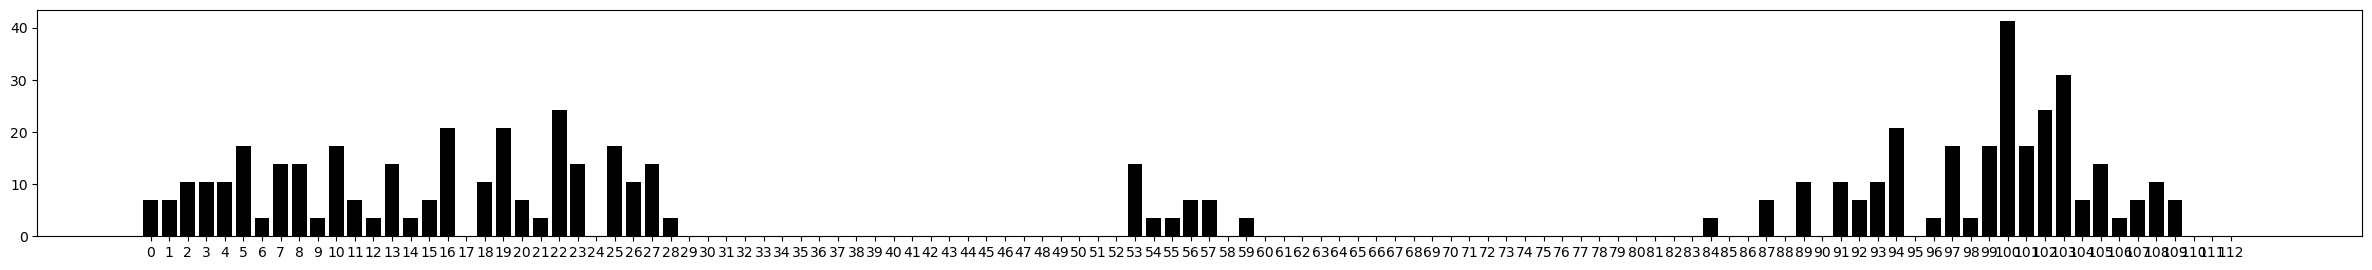

In [31]:
fiveprimeUp_seq = pd.DataFrame.from_dict([fiveprimeUp_seq.get(key) for key in['A', 'C', 'G', 'U']]).T
fiveprimeDown_seq = pd.DataFrame.from_dict([fiveprimeDown_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
fiveprimeLoop_seq = pd.DataFrame.from_dict([fiveprimeLoop_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeUp_seq = pd.DataFrame.from_dict([threeprimeUp_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeDown_seq = pd.DataFrame.from_dict([threeprimeDown_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
threeprimeLoop_seq = pd.DataFrame.from_dict([threeprimeLoop_seq.get(key) for key in ['A', 'C', 'G', 'U']]).T
#copy_bulges = copy.copy(bulges)
for n in bulges:
    if bulges[n]['nr_mirna_5p'] == 0 and bulges[n]['nr_mirna_3p'] == 0:
        continue
    if 'Up5pMature' not in bulges[n]:
        continue
    for y in range(len(bulges[n]['Up5pMature'])):
        bulges[n]['Up5pMature'][y] = bulges[n]['Up5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Down5pMature'])):
        bulges[n]['Down5pMature'][y] = bulges[n]['Down5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Loop5pMature'])):
        bulges[n]['Loop5pMature'][y] = bulges[n]['Loop5pMature'][y] / bulges[n]['nr_mirna_5p']*100
    for y in range(len(bulges[n]['Up3pMature'])):
        bulges[n]['Up3pMature'][y] = bulges[n]['Up3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    for y in range(len(bulges[n]['Down3pMature'])):
        bulges[n]['Down3pMature'][y] = bulges[n]['Down3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    for y in range(len(bulges[n]['Loop3pMature'])):
        bulges[n]['Loop3pMature'][y] = bulges[n]['Loop3pMature'][y] / bulges[n]['nr_mirna_3p']*100
    
UG_5p   = [x / float(total_5p) * 100 for x in UG_5p]
UG_3p   = [x / float(total_3p) * 100 for x in UG_3p]
UGUG_5p = [x / float(total_5p) * 100 for x in UGUG_5p]
UGUG_3p = [x / float(total_3p) * 100 for x in UGUG_3p]
CNNC_5p = [x / float(total_5p) * 100 for x in CNNC_5p]
CNNC_3p = [x / float(total_3p) * 100 for x in CNNC_3p]

Up5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Up5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Up5pMature']
for n in SpeciesDictUp:
    Up5pMature[n] = SpeciesDictUp[n]
Up5pMature = pd.DataFrame.from_dict(Up5pMature, orient = 'index')

Down5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Down5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Down5pMature']
for n in SpeciesDictUp:
    Down5pMature[n] = SpeciesDictUp[n]
Down5pMature = pd.DataFrame.from_dict(Down5pMature, orient = 'index')

Loop5pMature = {}
SpeciesDictUp = {}
for n in bulges:
    if 'Loop5pMature' in bulges[n]:
        SpeciesDictUp[str(n) + 'N=' + str(bulges[n]['nr_mirna_5p'])] = bulges[n]['Loop5pMature']
for n in SpeciesDictUp:
    Loop5pMature[n] = SpeciesDictUp[n]
Loop5pMature = pd.DataFrame.from_dict(Loop5pMature, orient = 'index')


##################### 5p Mature USE THESE ########################
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
5p Mature Sequential Motifs


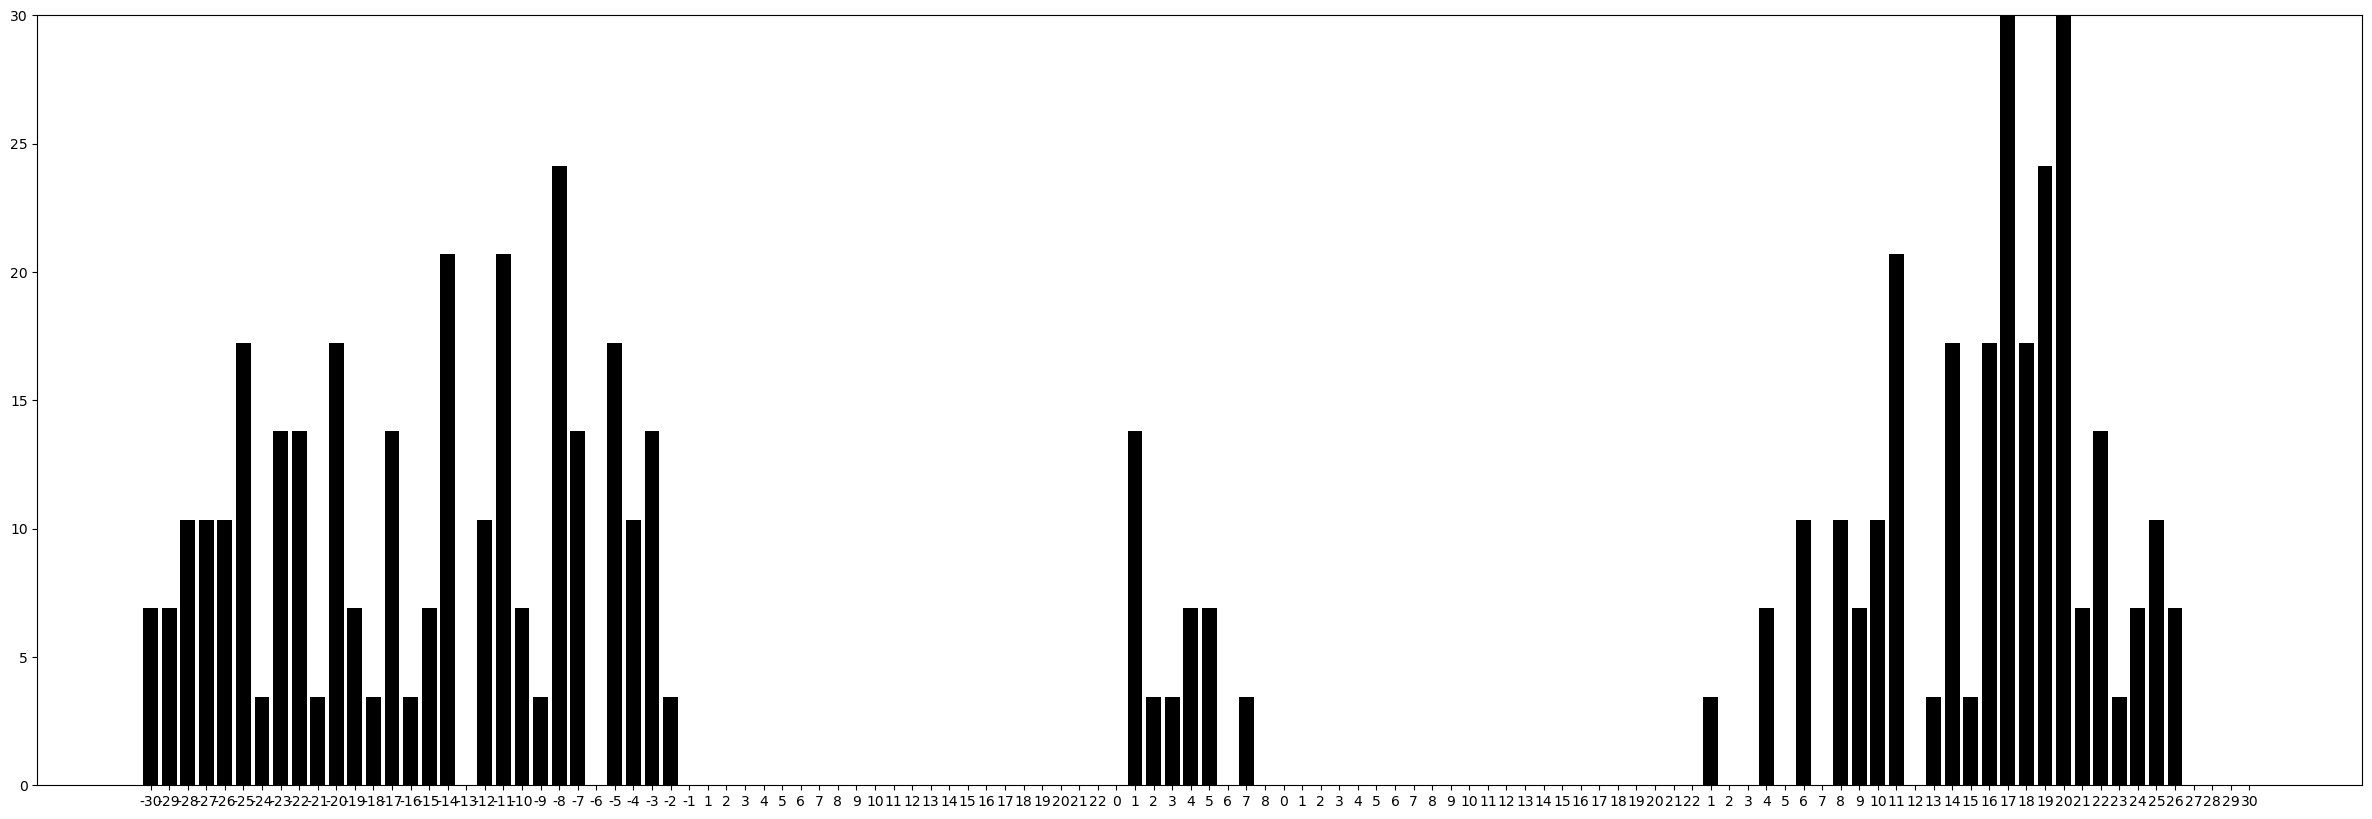

5p Mature Bulge Heatmap


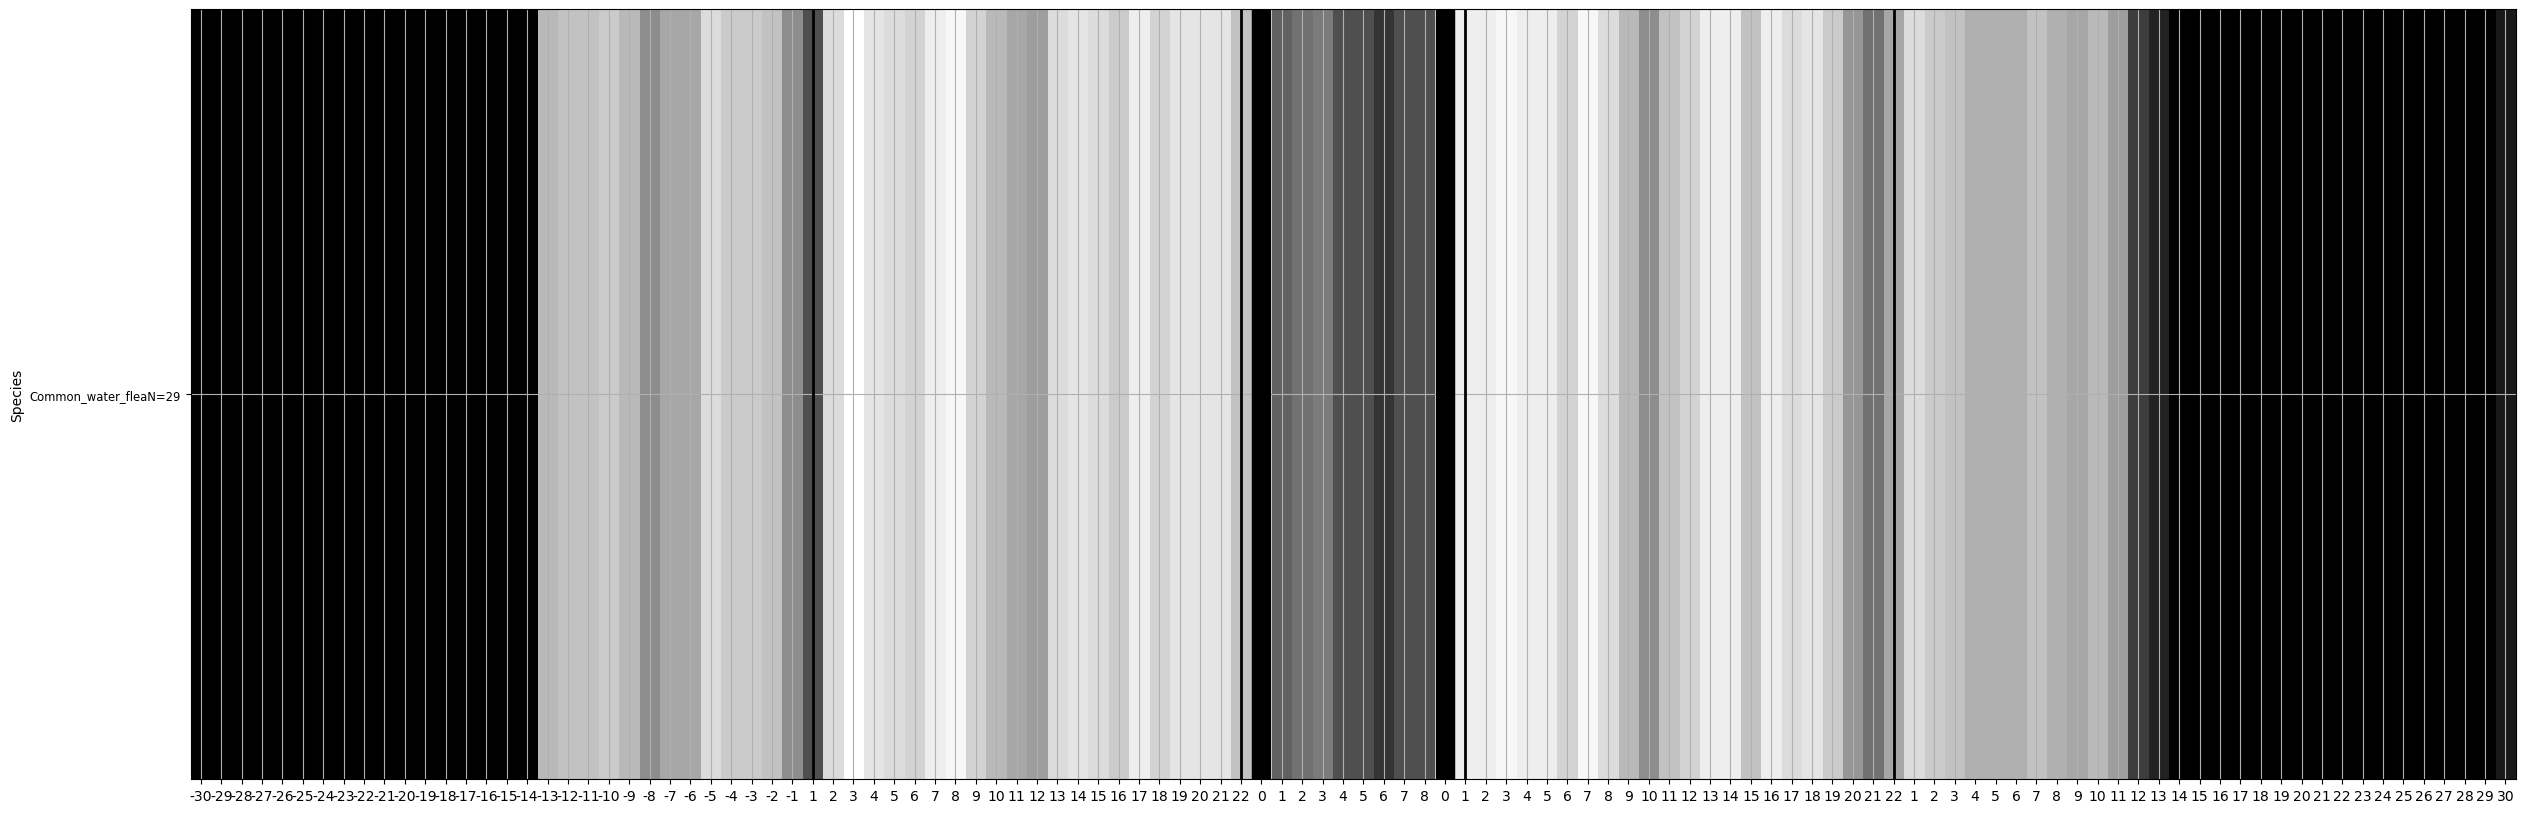

5p Mature Nucleotide frequency


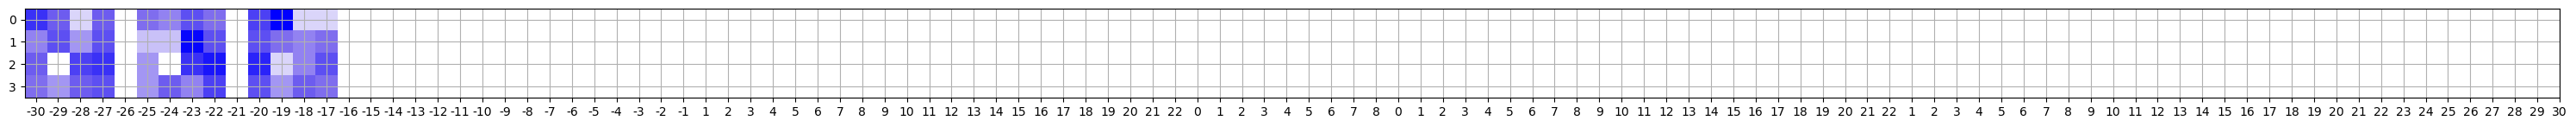

In [32]:
print('##################### 5p Mature USE THESE ########################')
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 10)
cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'mediumslateblue', 'blue'])
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['white', 'black'])

Up5pMature[52] = 0
#Loop5pMature[8] = 0
Both5pMature = pd.concat([Up5pMature, Loop5pMature, Down5pMature], axis=1)
print('5p Mature Sequential Motifs')
#ax1 = plt.subplot(311)
plt.bar(range(len(UG_5p+[0]*23+UGUG_5p+[0]*23+CNNC_5p)), UG_5p+[0]*23+UGUG_5p+[0]*23+CNNC_5p, color='black')
plt.xticks(list(range(Both5pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop5pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.ylim([0, 30])
plt.show()
print('5p Mature Bulge Heatmap')
#ax2 = plt.subplot(312, sharex=ax1)
plt.imshow(Both5pMature, cmap=cmap2, aspect='auto')
plt.yticks(range(len(Both5pMature.index)), Both5pMature.index, size='small')
plt.xticks(list(range(Both5pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop5pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.axvline(x=30, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=51, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=Up5pMature.shape[1]-1, ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up5pMature.shape[1]-1+Loop5pMature.shape[1], ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up5pMature.shape[1] + Loop5pMature.shape[1], ymin=0, ymax=27, linewidth=2, color='k')
plt.axvline(x=Up5pMature.shape[1] + Loop5pMature.shape[1] + 21, ymin=0, ymax=27, linewidth=2, color='k')
plt.grid()
plt.ylabel('Species')
plt.show()
fiveprimeUp_seq[53] = 0
fiveprimeLoop_seq[8] = 0
fiveprimeBoth_seq = pd.concat([fiveprimeUp_seq.iloc[0:4], fiveprimeLoop_seq.iloc[0:4], fiveprimeDown_seq.iloc[0:4]], axis = 1)
print('5p Mature Nucleotide frequency')
#ax3 = plt.subplot(313, sharex=ax1)
plt.imshow(fiveprimeBoth_seq, cmap=cmap, vmin=0, vmax=50)
plt.yticks(range(len(list(fiveprimeBoth_seq.index))),list(fiveprimeBoth_seq.index))
plt.xticks(list(range(Both5pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop5pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
#ax3.set_ylim([0, 4])
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 10)
cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'mediumslateblue', 'blue'])
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['white', 'black'])
print('##################### 3p Mature USE THESE ########################')
#Up3pMature[52] = 0
#Loop3pMature[8] = 0
Both3pMature = pd.concat([Up3pMature, Loop3pMature, Down3pMature], axis=1)
print('3p Mature Sequential Motifs')

#ax1 = plt.subplot(311)
plt.bar(range(len(UG_3p+[0]*23+UGUG_3p+[0]*23+CNNC_3p)), UG_3p+[0]*23+UGUG_3p+[0]*23+CNNC_3p, color='black')
plt.xticks(list(range(Both3pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop3pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.ylim([0, 30])
plt.show()
print('3p Mature Bulge Heatmap')

#ax2 = plt.subplot(312, sharex=ax1)
plt.imshow(Both3pMature, cmap=cmap2, aspect='auto')
plt.yticks(range(len(Both3pMature.index)), Both3pMature.index, size='small')
plt.axvline(x=30, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=51, ymin=0, ymax = 27, linewidth=2, color='k')
plt.axvline(x=Up3pMature.shape[1]-1, ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up3pMature.shape[1]-1+Loop3pMature.shape[1], ymin=0, ymax=27, linewidth=14, color='k')
plt.axvline(x=Up3pMature.shape[1] + Loop3pMature.shape[1], ymin=0, ymax=27, linewidth=2, color='k')
plt.axvline(x=Up3pMature.shape[1] + Loop3pMature.shape[1] + 21, ymin=0, ymax=27, linewidth=2, color='k')
plt.grid()
plt.xticks(list(range(Both3pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop3pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))
plt.ylabel('Species')
plt.show()
threeprimeUp_seq[53] = 0
threeprimeLoop_seq[8] = 0
threeprimeBoth_seq = pd.concat([threeprimeUp_seq.iloc[0:4], threeprimeLoop_seq.iloc[0:4], threeprimeDown_seq.iloc[0:4]], axis = 1)
print('3p Mature Nucleotide frequency')
#ax3 = plt.subplot(313, sharex=ax1)
plt.imshow(threeprimeBoth_seq, cmap=cmap, vmin=0, vmax=50)
plt.yticks(range(len(list(threeprimeBoth_seq.index))),list(threeprimeBoth_seq.index))
plt.xticks(list(range(Both3pMature.shape[1])), list(range(-30,0)) + list(range(1, 23)) + list(range(0, Loop3pMature.shape[1])) + list(range(0, 23)) + list(range(1, 31)))

#ax3.set_ylim([0, 4])
plt.grid()

plt.tight_layout()
plt.show()
